In [ ]:
import keras

In [ ]:
from keras.datasets import mnist

In [ ]:
data = mnist.load_data()

In [ ]:
len(data)

2

In [ ]:
(train_images, train_labels), (test_images, test_labels) = data

In [ ]:
len(train_images)

60000

In [ ]:
len(train_labels)

60000

In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))

In [ ]:
train_images = train_images.astype('float')/255

In [ ]:
test_images = test_images.reshape((10000, 28, 28, 1))

In [ ]:
test_images = test_images.astype('float')/255

In [ ]:
train_labels[1]

0

In [ ]:
from keras.preprocessing import image

In [ ]:
import matplotlib.pyplot as plt

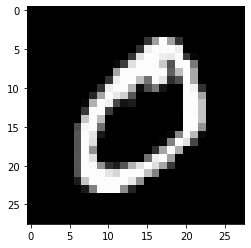

In [ ]:
plt.imshow(image.array_to_img(train_images[1]), cmap="gray")

In [ ]:
#0 -> [1, 0, 0, 0, 0, 0 , 0 , 0]
#1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels_original = train_labels
train_labels = to_categorical(train_labels)

In [ ]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
test_labels_original = test_labels
test_labels = to_categorical(test_labels)

In [ ]:
from keras import layers, models

In [ ]:
model = models.Sequential()

In [ ]:
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2,2)))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.MaxPooling2D((2, 2)))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
__________________________________________________

In [ ]:
model.add(layers.Dense(64, activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [ ]:
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=10, batch_size=64)

Epoch 1/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.1776 - accuracy: 0.9439
Epoch 2/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0459 - accuracy: 0.9854
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0321 - accuracy: 0.9899
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.0237 - accuracy: 0.9925
Epoch 5/10
60000/60000 [==============================] - 4s 65us/step - loss: 0.0186 - accuracy: 0.9941
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0151 - accuracy: 0.9954
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0116 - accuracy: 0.9968
Epoch 8/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0100 - accuracy: 0.9970
Epoch 9/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0084 - accuracy: 0.9974
Epoch 10/10
60000/60000 [==============================

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 64us/step


In [ ]:
test_loss

0.05398773255599161

In [ ]:
test_accuracy

0.9884999990463257

In [ ]:
predictions = model.predict(test_images)
#import numpy as np
#predicted_classes = np.argmax(predictions, axis = 1)

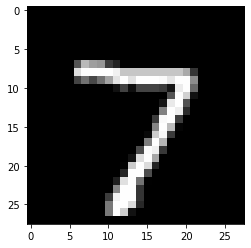

In [ ]:
plt.imshow(image.array_to_img(test_images[0]), cmap="gray")

In [ ]:
test_labels_original[0]

7

In [ ]:
predictions[0]

array([5.4189717e-17, 2.1640814e-14, 2.0068752e-15, 9.6721069e-13,
       2.4714844e-16, 4.0625649e-13, 1.5338925e-19, 1.0000000e+00,
       1.7989025e-16, 1.3227971e-12], dtype=float32)

In [ ]:
predicted_classes[0]

7

In [ ]:
test_images[0].shape

(28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
img = image.load_img(path="/content/IMG_20200705_145900.jpg",grayscale=True,target_size=(28,28,1))
img = image.img_to_array(img)
test_img = img.reshape((1,28,28,1))
img_class = model.predict_classes(test_img)
prediction = img_class[0]


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [ ]:
prediction

8